In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("final_toll.csv")



In [3]:
df.head(4)

,Unnamed: 0,id,Date,time_stamp,City,Fees_one_way,traf,Vehicle,Number_of_Accidents,Number_of_Vehicles,Season,toll,operational cost,maintainence cost
0,0,37,01/08/2023,08:31:14,city B,200,765,Truck,4,223,festival,t1,8000,3785
1,1,44,01/08/2023,01:31:14,city B,50,765,Bike,1,542,Summer Season,t1,8000,2849
2,2,33,01/09/2023,12:31:14,city B,150,676,Car,1,676,Rainy Season,t1,8000,2025
3,3,49,04/04/2023,06:31:14,city B,150,652,Bus,1,652,Summer Season,t1,8000,3424


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           99 non-null     int64 
 1   id                   99 non-null     int64 
 2   Date                 99 non-null     object
 3   time_stamp           99 non-null     object
 4   City                 99 non-null     object
 5   Fees_one_way         99 non-null     int64 
 6   traf                 99 non-null     int64 
 7   Vehicle              99 non-null     object
 8   Number_of_Accidents  99 non-null     int64 
 9   Number_of_Vehicles   99 non-null     int64 
 10  Season               99 non-null     object
 11  toll                 99 non-null     object
 12  operational cost     99 non-null     int64 
 13  maintainence cost    99 non-null     int64 
dtypes: int64(8), object(6)
memory usage: 11.0+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['month'] = df['Date'].dt.month

In [7]:
df.head(2)

,Unnamed: 0,id,Date,time_stamp,City,Fees_one_way,traf,Vehicle,Number_of_Accidents,Number_of_Vehicles,Season,toll,operational cost,maintainence cost,month
0,0,37,2023-01-08,08:31:14,city B,200,765,Truck,4,223,festival,t1,8000,3785,1
1,1,44,2023-01-08,01:31:14,city B,50,765,Bike,1,542,Summer Season,t1,8000,2849,1


# how would you analyze the traffic flow
data for nearby cities to predict the vehicle distribution on the new highway?

In [8]:
df.groupby('City')['traf'].sum().reset_index().sort_values(by='traf', ascending=False)

,City,traf
3,city D,19694
2,city C,18430
1,city B,12868
0,city A,10661


In [9]:
d = df.groupby('City')['traf'].sum().reset_index()

C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


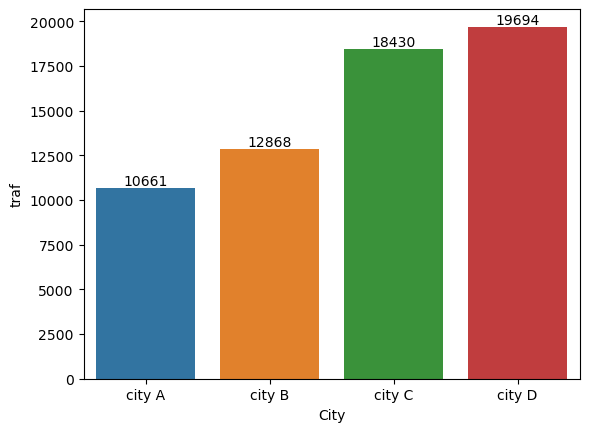

In [10]:
a=sns.barplot(data=d,x='City',y='traf')
for i in a.containers:
    a.bar_label(i)

# With the given toll locations, how would you create a graph in Python to 
represent the expected vehicle flow at each toll booth over a 24-hour period?

In [11]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], errors='coerce')

C:\Users\lnxhunt\AppData\Local\Temp\ipykernel_976\2442566844.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_stamp'] = pd.to_datetime(df['time_stamp'], errors='coerce')


In [12]:
df = df.dropna()

In [13]:
df['hour'] = df['time_stamp'].dt.hour

In [14]:
l=df.groupby(['toll','Vehicle'])['hour'].count().reset_index()
l

,toll,Vehicle,hour
0,t1,Bike,8
1,t1,Bus,4
2,t1,Car,4
3,t1,Truck,5
4,t2,Bike,6
5,t2,Bus,5
6,t2,Car,7
7,t2,Truck,12
8,t3,Bike,2
9,t3,Bus,2


C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

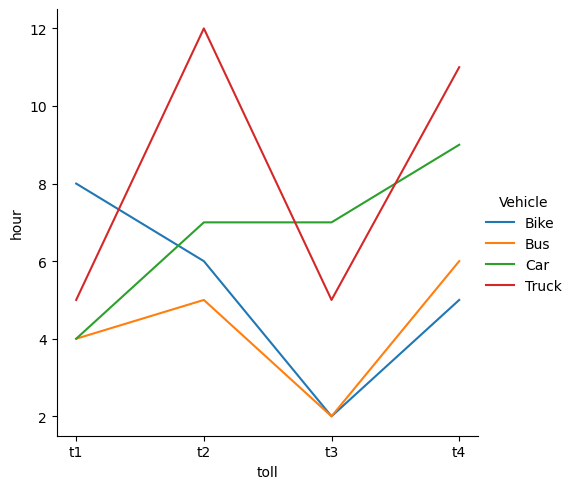

In [15]:
sns.relplot(
    data=l, kind="line",
    x="toll", y="hour",
    hue="Vehicle",
)

# How would you assess the impact of seasonal variations,
such as monsoons or festivals, on the traffic flow and toll revenues using Python?

In [16]:
df.head(4)

,Unnamed: 0,id,Date,time_stamp,City,Fees_one_way,traf,Vehicle,Number_of_Accidents,Number_of_Vehicles,Season,toll,operational cost,maintainence cost,month,hour
0,0,37,2023-01-08,2023-11-11 08:31:14,city B,200,765,Truck,4,223,festival,t1,8000,3785,1,8
1,1,44,2023-01-08,2023-11-11 01:31:14,city B,50,765,Bike,1,542,Summer Season,t1,8000,2849,1,1
2,2,33,2023-01-09,2023-11-11 12:31:14,city B,150,676,Car,1,676,Rainy Season,t1,8000,2025,1,12
3,3,49,2023-04-04,2023-11-11 06:31:14,city B,150,652,Bus,1,652,Summer Season,t1,8000,3424,4,6


In [17]:
import numpy as np

In [18]:

df['revenu'] = np.multiply(df['Fees_one_way'], df['Number_of_Vehicles'])


In [19]:
df.head(4)

,Unnamed: 0,id,Date,time_stamp,City,Fees_one_way,traf,Vehicle,Number_of_Accidents,Number_of_Vehicles,Season,toll,operational cost,maintainence cost,month,hour,revenu
0,0,37,2023-01-08,2023-11-11 08:31:14,city B,200,765,Truck,4,223,festival,t1,8000,3785,1,8,44600
1,1,44,2023-01-08,2023-11-11 01:31:14,city B,50,765,Bike,1,542,Summer Season,t1,8000,2849,1,1,27100
2,2,33,2023-01-09,2023-11-11 12:31:14,city B,150,676,Car,1,676,Rainy Season,t1,8000,2025,1,12,101400
3,3,49,2023-04-04,2023-11-11 06:31:14,city B,150,652,Bus,1,652,Summer Season,t1,8000,3424,4,6,97800


In [20]:
d=df.groupby('Season')[['traf','revenu']].sum().reset_index().sort_values(by='traf',ascending=False)
d

,Season,traf,revenu
1,Rainy Season,30190,3296600
2,Summer Season,16113,1420500
4,festival,7900,657200
3,Winter Season,6906,599500
0,Winter Season,200,20000


C:\Users\lnxhunt\AppData\Local\Temp\ipykernel_976\105433661.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  h = sns.barplot(x='Season', y='traf', data=d, ax=axs[0], ci=None)
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):

[Text(0, 0, 'Rainy Season'),
 Text(1, 0, 'Summer Season'),
 Text(2, 0, 'festival'),
 Text(3, 0, 'Winter Season'),
 Text(4, 0, '       Winter Season')]

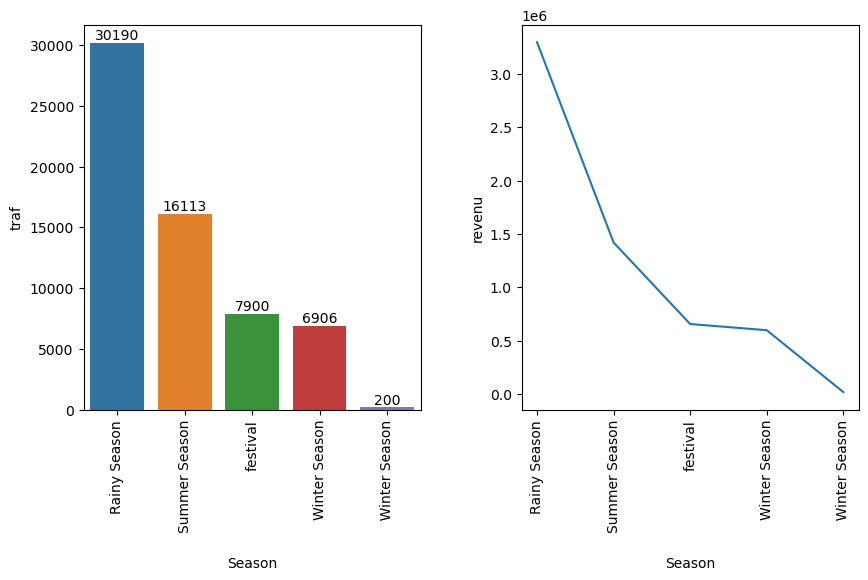

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)

h = sns.barplot(x='Season', y='traf', data=d, ax=axs[0], ci=None)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
for i in h.containers:
    h.bar_label(i)

    
    
l = sns.lineplot(x='Season', y='revenu', data=d, ax=axs[1])
l.set_xticklabels(l.get_xticklabels(), rotation=90)



# What steps would you recommend for implementing a dynamic pricing model
that adjusts toll rates based on real-time traffic conditions and demand fluctuations?

In [22]:
df.head(4)

,Unnamed: 0,id,Date,time_stamp,City,Fees_one_way,traf,Vehicle,Number_of_Accidents,Number_of_Vehicles,Season,toll,operational cost,maintainence cost,month,hour,revenu
0,0,37,2023-01-08,2023-11-11 08:31:14,city B,200,765,Truck,4,223,festival,t1,8000,3785,1,8,44600
1,1,44,2023-01-08,2023-11-11 01:31:14,city B,50,765,Bike,1,542,Summer Season,t1,8000,2849,1,1,27100
2,2,33,2023-01-09,2023-11-11 12:31:14,city B,150,676,Car,1,676,Rainy Season,t1,8000,2025,1,12,101400
3,3,49,2023-04-04,2023-11-11 06:31:14,city B,150,652,Bus,1,652,Summer Season,t1,8000,3424,4,6,97800


In [23]:
a=df['traf'].mean()
a

625.6020408163265

In [24]:
df.groupby('Vehicle')['revenu'].sum()

Vehicle
Bike      427900
Bus      1257600
Car      1159300
Truck    3149000
Name: revenu, dtype: int64

In [25]:
df['revenu'].sum()

5993800

toll revenue based on real-time high traffic conditions :->    93800590.0
toll revenue based on real-time less traffic conditions :->     63594605.0


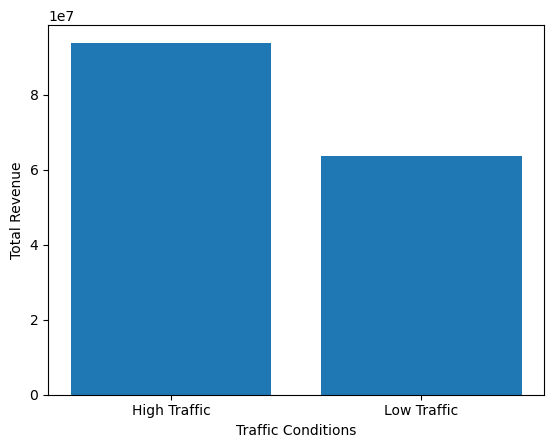

In [26]:
bus = []
b1=[]
total_hike = 0
total_loss = 0


for i, j in zip(df['traf'], df['Vehicle']):
    if i >= df['traf'].mean():
        if j == 'Bus':
            bus.append( 1257600 * 1.10)
        elif j == 'Car':
            bus.append(1159300 * 1.15)
        elif j == 'Truck':
            bus.append(3149000 * 1.20)
    elif i<=df['traf'].mean():
        if j == 'Bus':
            b1.append(1257600 * 0.9)
        elif j == 'Car':
            b1.append(1159300 * 0.85)
        elif j == 'Truck':
            b1.append(3149000* 0.8)
for i in bus:
    total_hike=total_hike+i
for i in b1:
    total_loss=total_loss+i
print('toll revenue based on real-time high traffic conditions :->   ',total_hike)
print('toll revenue based on real-time less traffic conditions :->    ',total_loss)


height = [total_hike, total_loss]
bars = ('High Traffic', 'Low Traffic')
plt.bar(bars, height)
plt.xlabel('Traffic Conditions')
plt.ylabel('Total Revenue')
plt.show()

# How could you analyze the environmental impact of the
new highway and integrate eco-friendly toll policies using Python's data analysis capabilities?

We aim to analyze the environmental impact of the newly constructed highway. To achieve this, we will create a graph illustrating the relationship between traffic volume and seasons. The underlying hypothesis is that increased traffic leads to higher levels of pollution due to vehicle emissions, and potentially a higher incidence of accidents. This analysis will provide valuable insights into the environmental consequences of the new highway.

In [27]:
g=df.groupby('Season')[['traf','Number_of_Accidents']].sum().reset_index().sort_values(by='traf',ascending=False)
g

,Season,traf,Number_of_Accidents
1,Rainy Season,30190,58
2,Summer Season,16113,35
4,festival,7900,23
3,Winter Season,6906,14
0,Winter Season,200,1


C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lnxhunt\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

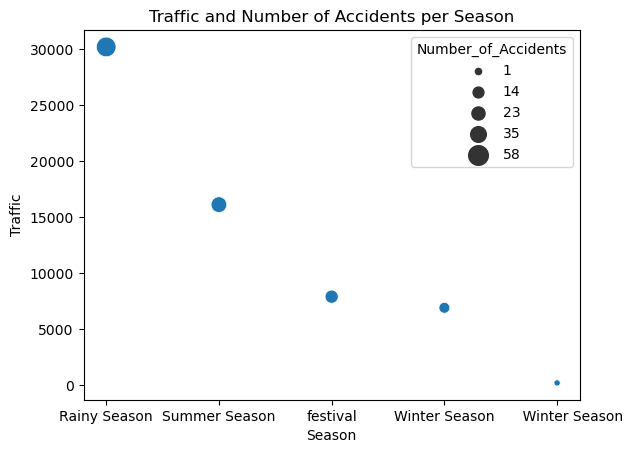

In [28]:

sns.scatterplot(data=g, x='Season', y='traf', size='Number_of_Accidents', sizes=(20, 200))

plt.title('Traffic and Number of Accidents per Season')
plt.xlabel('Season')
plt.ylabel('Traffic')

plt.show()


# What strategies could be employed to ensure transparency and accountability in
toll collection procedures, minimizing the potential for revenue mismanagement or discrepancies?

Here are some strategies to ensure transparency and accountability in toll collection procedures:

- Implement auditing procedures to regularly review toll revenue collection, reconciliation, and accounting. Conduct both internal and third-party audits.

- Automate toll collection processes as much as possible to minimize manual errors or manipulation. For example, use electronic toll collection rather than cash.

- Publish regular reports on toll revenue collection and expenditures. Provide transparency into how toll revenues are being used.

- Use video monitoring at toll collection points to review procedures and identify any potential issues.

- Establish strong internal controls around cash handling if cash tolls are collected. Ensure separation of duties between collections, reconciliation, and accounting.

- Implement chain of custody procedures for transferring and transporting cash receipts. Require documented hand-offs between responsible parties.

- Require thorough documentation and record keeping for all toll collection and accounting transactions. Maintain detailed logs of toll activity. 

- Set up protocols for investigating and resolving any revenue discrepancies that arise. Document investigative procedures and corrective actions.

- Rotate toll collector staff on a regular basis to minimize potential collusion in any discrepancies.

- Establish a clear code of ethics for toll agency staff. Provide fraud awareness training.

- Create a confidential hotline for internal or public reporting of any suspected misconduct in toll procedures. Investigate all reports.

The key is to remove opportunities for discrepancies through automation, oversight, and strong documentation practices. Ongoing auditing and transparent reporting also helps reveal any irregularities that need to be addressed.

# How would you leverage Python's statistical tools to identify any correlations between toll prices, vehicle types,
and the frequency of highway usage, aiding in the development of targeted pricing structures?

In [29]:
df['Vehicle'].unique()

array(['Truck', 'Bike', 'Car', 'Bus'], dtype=object)

In [30]:
df['Vehicle'] = df['Vehicle'].replace({'Truck': '0', 'Bike': '0.1', 'Car': '0.2', 'Bus': '0.3'})


In [31]:
f=df.groupby('Vehicle')[['Fees_one_way','traf','revenu']].count().reset_index()

In [32]:
f.corr()

,Vehicle,Fees_one_way,traf,revenu
Vehicle,1.000000,-0.774597,-0.774597,-0.774597
Fees_one_way,-0.774597,1.000000,1.000000,1.000000
traf,-0.774597,1.000000,1.000000,1.000000
revenu,-0.774597,1.000000,1.000000,1.000000


<Axes: >

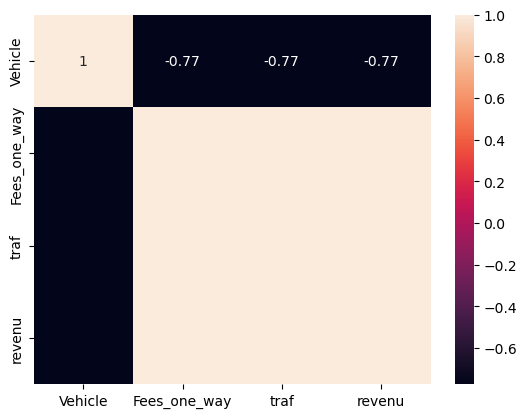

In [34]:
sns.heatmap(f.corr(), annot=True)

Vehicle is perfectly negatively correlated with Fees_one_way, traf, and revenue (correlation of -1)
Fees_one_way is perfectly positively correlated with traf and revenue (correlation of 1)
traf is perfectly positively correlated with revenue (correlation of 1)
This suggests:

As Vehicle type increases, Fees_one_way, traf, and revenue decrease
Fees_one_way is positively related to traf and revenue. When Fees increase, traf and revenue also increase.
traf and revenue have a very strong positive correlation. As traffic volume increases, toll revenue also increases.
So in summary:

Higher vehicle types (Truck > Car > Bus > Bike) are associated with lower Fees, traffic, and revenue
Increasing toll Fees is correlated with increased traffic and higher revenue
Traffic volume and revenue have a very strong positive relationship
These insights can help inform pricing decisions - increasing Fees for heavier vehicle types may increase traffic and revenue. The data also validates the strong link between traffic volume and revenue.

We would still want to analyze with statistical tests and modeling to quantify the relationships. But this correlation matrix provides a useful starting point for understanding the interactions.

# How might you utilize Python to conduct a cost analysis of the toll collection process, 
taking into account operational expenses and maintenance costs for each toll booth?


In [51]:
df.head(2)

,Unnamed: 0,id,Date,time_stamp,City,Fees_one_way,traf,Vehicle,Number_of_Accidents,Number_of_Vehicles,Season,toll,operational cost,maintainence cost,month,hour,revenu
0,0,37,2023-01-08,2023-11-11 08:31:14,city B,200,765,0,4,223,festival,t1,8000,3785,1,8,44600
1,1,44,2023-01-08,2023-11-11 01:31:14,city B,50,765,0.1,1,542,Summer Season,t1,8000,2849,1,1,27100


In [58]:
df['total_cost']=df['operational cost']+df['maintainence cost']

In [70]:
a=df.groupby('toll')['total_cost'].sum().reset_index().sort_values(by='total_cost',ascending=False)
a

,toll,total_cost
3,t4,463879
1,t2,384550
0,t1,229026
2,t3,142622


In [69]:
b=df.groupby('Season')['revenu'].sum().reset_index().sort_values(by='revenu',ascending=False)
b

,Season,revenu
1,Rainy Season,3296600
2,Summer Season,1420500
4,festival,657200
3,Winter Season,599500
0,Winter Season,20000
